# My first jupyter notebook, noice

Just an example where linear regression performs better than DT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

## Create data

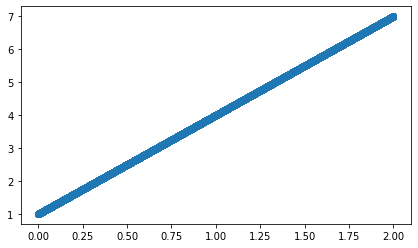

In [2]:
plt.figure(figsize=(7,4))
x = np.linspace(0,2,10000)
y = 1+ 3*x
plt.scatter(x,y)
plt.show()

In [3]:
# random permutation of 0..len-1, then crop off 30%, then sort remainder
idxs_train = sorted(np.random.permutation(len(x))[:int(0.7*len(x))])
idx_test = [i for i in range(0,len(x)) if i not in idxs_train]

# train, validation set split
x_trn, x_val = x[idxs_train,None], x[idx_test,None] # model expects 2D arrays
y_trn, y_val = y[idxs_train,None], y[idx_test,None]


# fit a model
dt = DecisionTreeRegressor(max_depth=3).fit(x_trn, y_trn)
l = LinearRegression().fit(x_trn, y_trn)

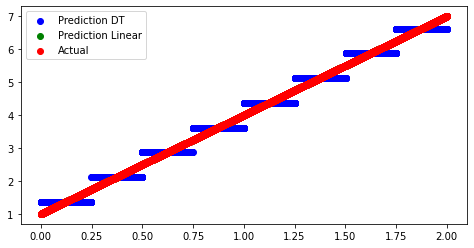

In [13]:
plt.figure(figsize=(8,4))
plt.scatter(x,dt.predict(x[:,None]),color='blue',label='Prediction DT')
plt.scatter(x,l.predict(x[:,None]),color='green',label='Prediction Linear')
plt.scatter(x,y,color='red',label='Actual')
plt.legend(loc='upper left')

In [7]:
from sklearn.tree import export_graphviz
import IPython, graphviz, re, math

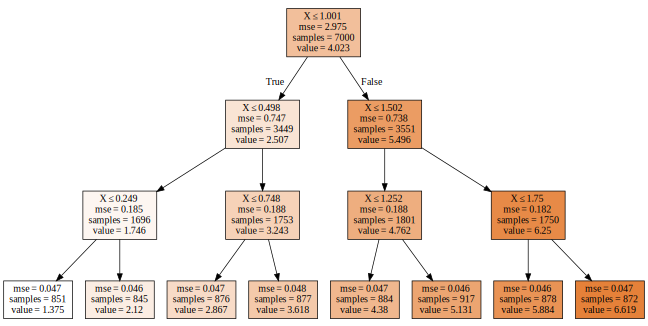

In [12]:
def draw_tree(t, col_names, size=9, ratio=0.5, precision=3):
    """ Draws a representation of a random forest in IPython.
    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s = export_graphviz(t, out_file=None, feature_names=col_names, filled=True,
                      special_characters=True, rotate=False, precision=precision)
    
    IPython.display.display(graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}',s)))
    
col_names =['X']
draw_tree(dt, col_names, precision=3)